In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier


In [41]:
cancer_data =  pd.read_csv('/home/fouzankhan/Advance Machine Learning LOCAL/Assignments/breast+cancer+wisconsin+diagnostic/data.csv')

In [42]:
cancer_data.shape

(569, 33)

In [43]:

null_rate = round(cancer_data.isna().sum().sort_values(ascending=False)/len(cancer_data)*100,2)
null_rate

Unnamed: 32                100.0
compactness_se               0.0
fractal_dimension_worst      0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
id                           0.0
diagnosis                    0.0
area_se                      0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                    0.0
perimeter_mean               0.0
texture_me

In [44]:
#dropping the unnamed 32 because of high null rate
#removing the id part becasuse we dont want that
cancer_data = cancer_data.drop(['Unnamed: 32'],axis=1)
cancer_data = cancer_data.drop(['id'],axis=1)

In [45]:
cancer_data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [46]:
cancer_data.diagnosis.replace({"M":1,"B":0},inplace=True)
cancer_data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [47]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
cancer_data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

/tmp/ipykernel_71999/3021618344.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_data[features[i]],color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
/home/fouzankhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_71999/3021618344.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

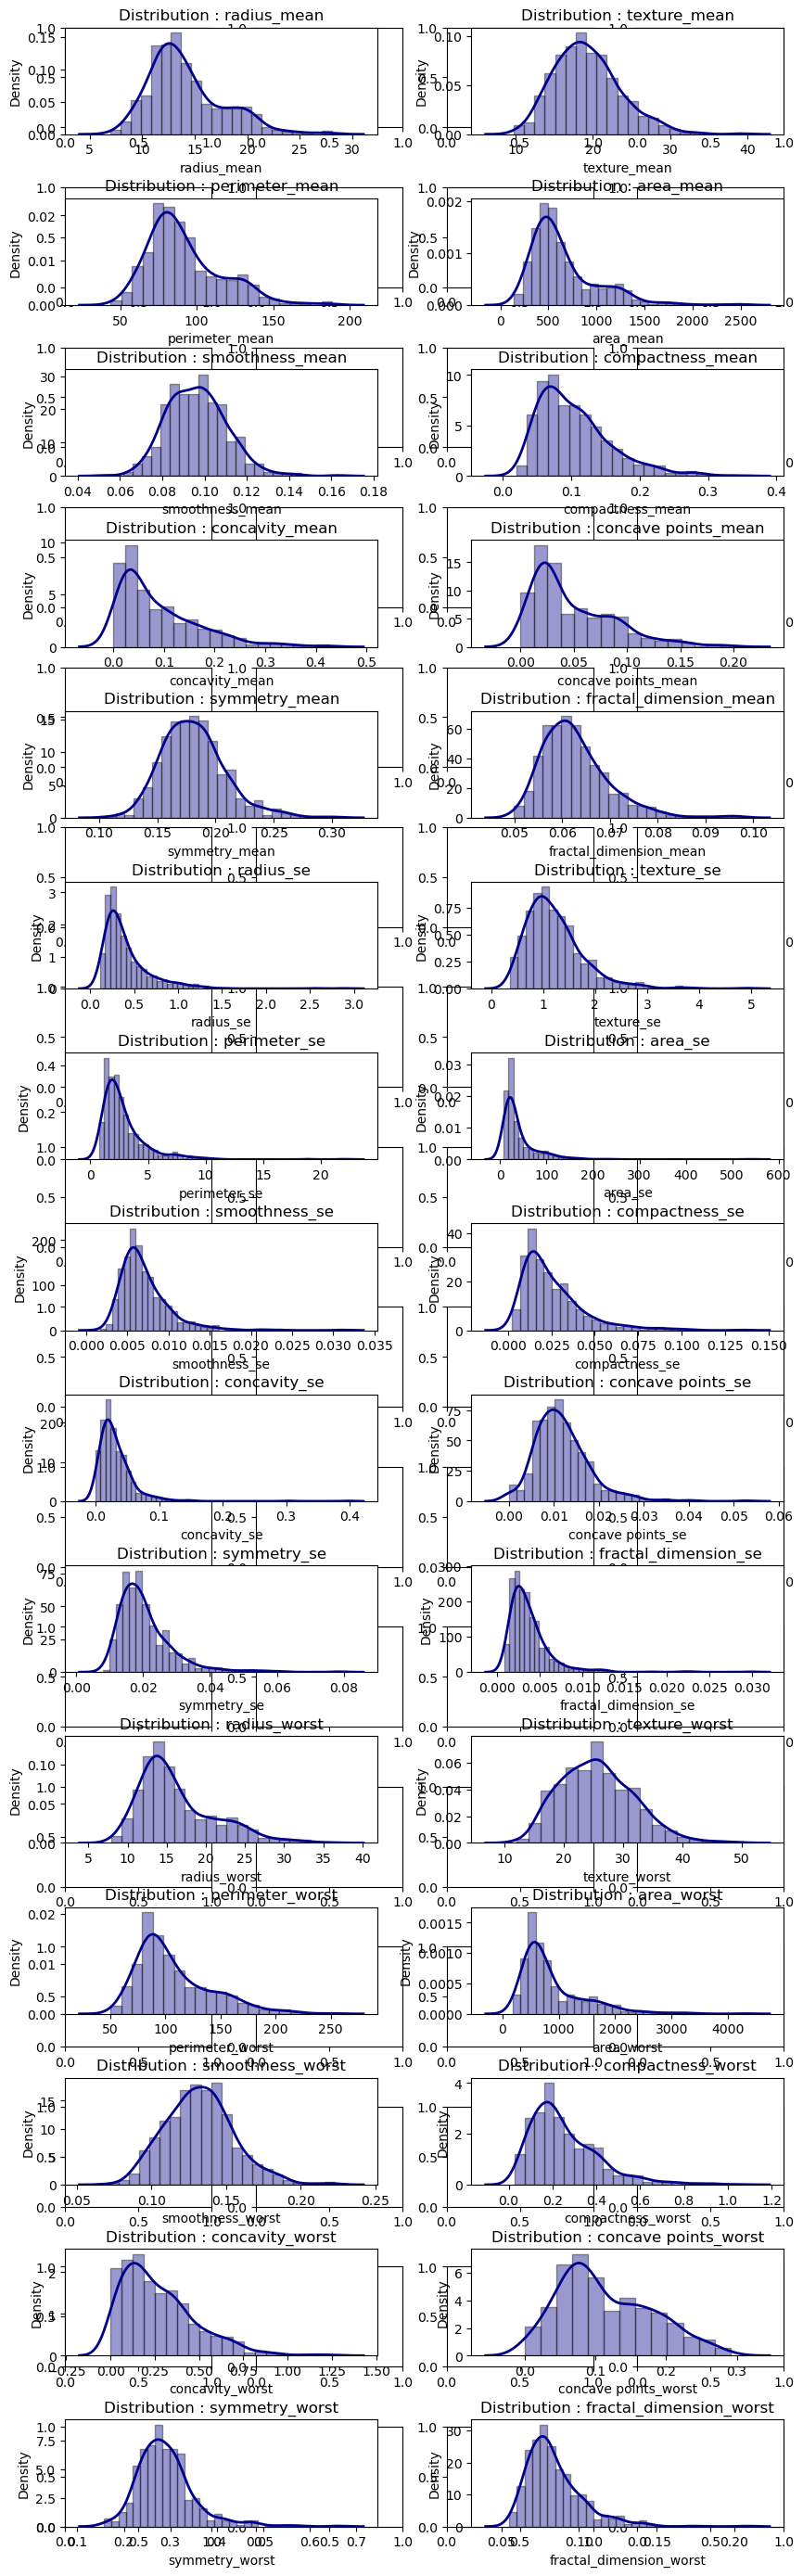

In [49]:
#majority of data has excellent distribution with o null rate
#will be retaining all the features
fig, ax = plt.subplots(nrows = 16,ncols = 4,figsize = (10,35))
plt.subplots_adjust(wspace=0.3, hspace=0.6)

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for i in range(len(features)):
    plt.subplot(15,2,i+1)
    sns.distplot(cancer_data[features[i]],color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
    title = 'Distribution : ' + features[i]
    plt.title(title)
plt.show()

In [50]:
#dividing the data and creating a standardized version of teh data
X = cancer_data.drop('diagnosis',axis = 1)
y = cancer_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 96)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)

In [51]:
def get_d_value(training_data, testing_data):
    '''this function will plot the scree plot of the components and help us decide a dvalues'''
    pca = PCA()
    x_training_pca = pca.fit_transform(training_data)
    x_testing_pca = pca.fit_transform(testing_data)
    explained_variance= pca.explained_variance_ratio_
    plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o',linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()

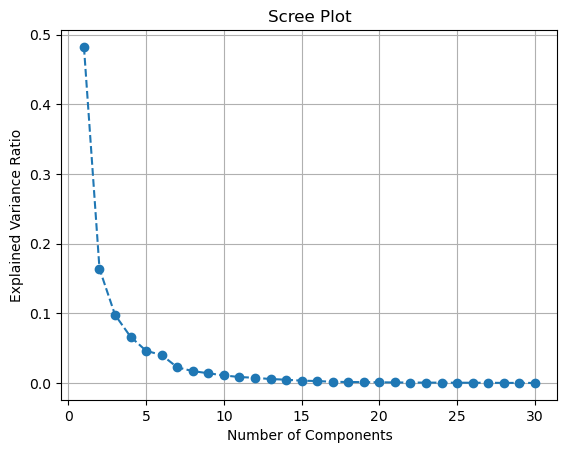

In [52]:
get_d_value(X_train_standardized, X_test_standardized)
#from this plot, deciding the d value to be 6 because its very good for us
#pd.DataFrame().iloc[:5].sum()

In [53]:
def generate_pca_lda(dvalue, training_data, testing_data, training_class):
    '''generating the X_trainig_lda, pca'''
    pca = PCA(dvalue)
    lda = LDA()
    X_training_lda = lda.fit_transform(training_data, training_class)
    X_testing_lda = lda.transform(testing_data)
    X_training_pca = pca.fit_transform(training_data)
    X_testing_pca = pca.transform(testing_data)
    return X_training_pca, X_testing_pca, X_training_lda, X_testing_lda
    
    

In [54]:
X_train_pca, X_test_pca, X_train_lda, X_test_lda = generate_pca_lda(5,X_train_standardized, X_test_standardized, y_train)
#print(X_train_lda)

In [55]:
X_train_pca

array([[ 4.60265441, -0.41075183,  3.58673363, -0.83191135, -0.03212493],
       [ 1.38906519, -1.17695852, -1.28921732, -0.70808726, -0.89083797],
       [-2.07453086,  1.46991742,  1.82242056, -2.96106312, -0.24405341],
       ...,
       [-3.0473129 , -1.45644194, -1.17135382,  0.35041136,  1.01672826],
       [-1.62385412,  0.85135294, -1.06476527,  1.36632565, -0.10819286],
       [-2.10599918,  0.46944449, -0.99214498,  0.26847057, -0.73017165]])

In [56]:
X_train_lda

array([[ 2.85785121e+00],
       [ 1.17253731e+00],
       [-1.37826623e+00],
       [-1.52635997e+00],
       [ 3.56084740e+00],
       [-1.42856836e+00],
       [ 4.42636560e+00],
       [-8.80581069e-01],
       [-3.49252081e-01],
       [-4.85834440e-01],
       [ 3.27937495e+00],
       [-1.04712431e+00],
       [-1.81829347e+00],
       [-1.96414726e+00],
       [-2.62599415e+00],
       [ 1.24356939e+00],
       [-1.65518980e+00],
       [-1.83187464e-01],
       [ 2.83118017e+00],
       [ 1.62544953e+00],
       [ 1.01405252e+00],
       [-1.42150541e+00],
       [ 6.62264940e-01],
       [ 1.28115395e+00],
       [ 1.96877336e+00],
       [-2.11436800e+00],
       [-2.42319279e+00],
       [-1.11626975e+00],
       [-5.71221041e-01],
       [ 2.23612886e+00],
       [-2.42563582e+00],
       [-1.32000401e+00],
       [ 1.49077997e+00],
       [-1.75485802e+00],
       [-9.96473897e-01],
       [-4.44279194e-01],
       [-8.32323107e-01],
       [-1.31739106e+00],
       [-3.4

In [57]:
model_list = ['SVM','randomforest', 'MLP']

In [58]:
def modelling(training_data, testing_data, training_class, testing_class, model_type):
    '''training data would be X_train, testing_data X_test, Training class = y_train, Testingclass = y_test'''
    models = {
        'RandomForest': RandomForestClassifier(max_depth = 15),
        'SVM': SVC(),
        'MultilayerPerceptron': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    }
    model = models[model_type]
    model.fit(training_data, training_class)
    predictions = model.predict(testing_data)
    conf_matrix = confusion_matrix(testing_class, predictions)
    accuracy = accuracy_score(testing_class, predictions)
    report = classification_report(testing_class, predictions)
    print(conf_matrix)
    print("\n")
    print(accuracy)
    print("\n")
    print(report)
    
    

In [59]:
#Performance of all the models on standardized_data


In [60]:
def evaluation(training_data, testing_data, training_class, testing_class, flag):
    #use standardized data
    datatype = ['Standardized Dataset','PCA','LDA']
    model_list = ['RandomForest','SVM','MultilayerPerceptron']
    for model in model_list:
        print(f'The data used in these models is based on {datatype[flag]}')
        print(f'This is the Confusion Matrix, Accuracy and Classification report of {model}')
        modelling(training_data,testing_data, training_class, testing_class, model)


In [61]:
#These are the values for the standardized dataset
evaluation(X_train_standardized, X_test_standardized, y_train, y_test,0)

The data used in these models is based on Standardized Dataset
This is the Confusion Matrix, Accuracy and Classification report of RandomForest
[[99  0]
 [10 62]]


0.9415204678362573


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.86      0.93        72

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.94      0.94       171

The data used in these models is based on Standardized Dataset
This is the Confusion Matrix, Accuracy and Classification report of SVM
[[99  0]
 [ 9 63]]


0.9473684210526315


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       1.00      0.88      0.93        72

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95     

In [62]:
#These are the values for the Test and train with PCA and different models
evaluation(X_train_pca, X_test_pca, y_train, y_test,1)

The data used in these models is based on PCA
This is the Confusion Matrix, Accuracy and Classification report of RandomForest
[[98  1]
 [ 7 65]]


0.9532163742690059


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.98      0.90      0.94        72

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.95      0.95       171

The data used in these models is based on PCA
This is the Confusion Matrix, Accuracy and Classification report of SVM
[[99  0]
 [ 9 63]]


0.9473684210526315


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       1.00      0.88      0.93        72

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

The data used in 

In [63]:
evaluation(X_train_lda, X_test_lda, y_train, y_test,2)

The data used in these models is based on LDA
This is the Confusion Matrix, Accuracy and Classification report of RandomForest
[[99  0]
 [ 9 63]]


0.9473684210526315


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        99
           1       1.00      0.88      0.93        72

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

The data used in these models is based on LDA
This is the Confusion Matrix, Accuracy and Classification report of SVM
[[99  0]
 [10 62]]


0.9415204678362573


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.86      0.93        72

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.94      0.94       171

The data used in 